In [2]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle
import pandas as pd

from plotter import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
year = '2017'

In [4]:
# Read the histogram from the pickle file
fatjetkin_ggf = pickle.load(open('pickles/'+year+'_fatjetkin.pkl','rb')).integrate('region','signal-ggf')
fatjetkin_vbf = pickle.load(open('pickles/'+year+'_fatjetkin.pkl','rb')).integrate('region','signal-vbf')

In [5]:
cuts = fatjetkin_ggf.axis('ddb1').edges()
cuts

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [6]:
pfratio_ggf = []
pfratio_vbf = []

for c in cuts:
    
    if c == 0.34:
        pfratio_ggf += [0]
        pfratio_vbf += [0]
        continue
    
    # vbf category
    p = fatjetkin_vbf.integrate('process','QCD').sum('pt1','eta1').integrate('ddb1',int_range=slice(c,1)).values()[()]
    f = fatjetkin_vbf.integrate('process','QCD').sum('pt1','eta1').integrate('ddb1',int_range=slice(0,c)).values()[()]
    if c == 0.64:
        print('vbf',c,p,f, 1.0*p/f)
    
    pfratio_vbf += [1.0*p/f]
    
    # ggf category
    p = fatjetkin_ggf.integrate('process','QCD').sum('pt1','eta1').integrate('ddb1',int_range=slice(c,1)).values()[()]
    f = fatjetkin_ggf.integrate('process','QCD').sum('pt1','eta1').integrate('ddb1',int_range=slice(0,c)).values()[()]
    if c == 0.64:
        print('ggf',c,p,f, 1.0*p/f)
        
    pfratio_ggf += [1.0*p/f]
    

vbf 0.64 392.49516408790055 193632.6898597585 0.002027008788506586
ggf 0.64 7138.798790026736 5020503.928598717 0.001421928732962721


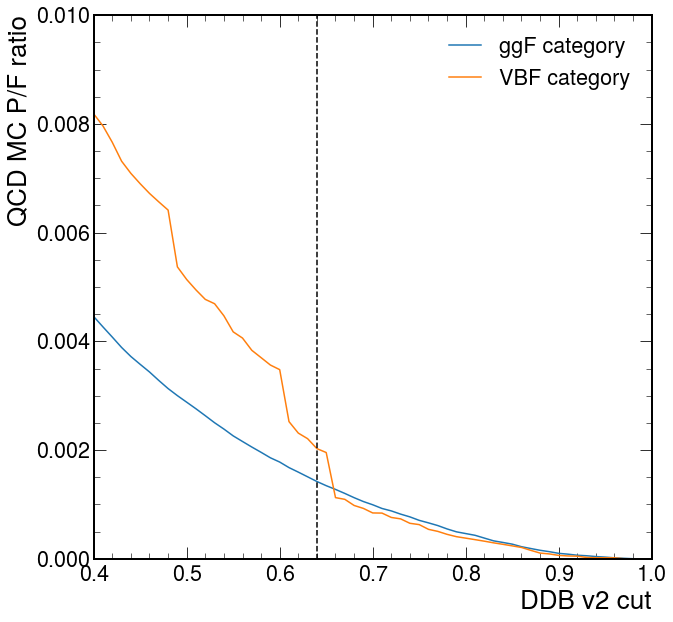

In [7]:
plt.plot(cuts,pfratio_ggf)
plt.plot(cuts,pfratio_vbf)
plt.legend(labels=["ggF category","VBF category"])
plt.xlabel('DDB v2 cut')
plt.ylabel('QCD MC P/F ratio')
plt.xlim(0.4,1)
plt.ylim(0,0.01)

plt.plot([0.64,0.64],[-1,1],color='black',linestyle='--')

In [8]:
sigeff_ggf = []
sigeff_vbf = []

for c in cuts:
    
    if c == 0.34:
        sigeff_ggf += [0]
        sigeff_vbf += [0]
        continue
    
    # vbf category
    acc_vbf = fatjetkin_vbf.integrate('process','VBF').sum('pt1','eta1').integrate('ddb1',int_range=slice(c,1)).values()[()]
    tot_vbf = fatjetkin_vbf.integrate('process','VBF').sum('pt1','eta1','ddb1').values()[()]
    
    acc_ggf = fatjetkin_ggf.integrate('process','VBF').sum('pt1','eta1').integrate('ddb1',int_range=slice(c,1)).values()[()]
    tot_ggf = fatjetkin_ggf.integrate('process','VBF').sum('pt1','eta1','ddb1').values()[()]
    if c == 0.64:
        print('vbf', 1.0*(acc_vbf+acc_ggf)/(tot_vbf+tot_ggf))
    
    sigeff_vbf += [1.0*(acc_vbf+acc_ggf)/(tot_vbf+tot_ggf)]
    
    # ggf category
    acc_vbf = fatjetkin_vbf.integrate('process','ggF').sum('pt1','eta1').integrate('ddb1',int_range=slice(c,1)).values()[()]
    tot_vbf = fatjetkin_vbf.integrate('process','ggF').sum('pt1','eta1','ddb1').values()[()]
    
    acc_ggf = fatjetkin_ggf.integrate('process','VBF').sum('pt1','eta1').integrate('ddb1',int_range=slice(c,1)).values()[()]
    tot_ggf = fatjetkin_ggf.integrate('process','VBF').sum('pt1','eta1','ddb1').values()[()]
    if c == 0.64:
        print('ggf', 1.0*(acc_vbf+acc_ggf)/(tot_vbf+tot_ggf))
    
    sigeff_ggf += [1.0*(acc_vbf+acc_ggf)/(tot_vbf+tot_ggf)]

vbf 0.32226904299257586
ggf 0.33854148543447316


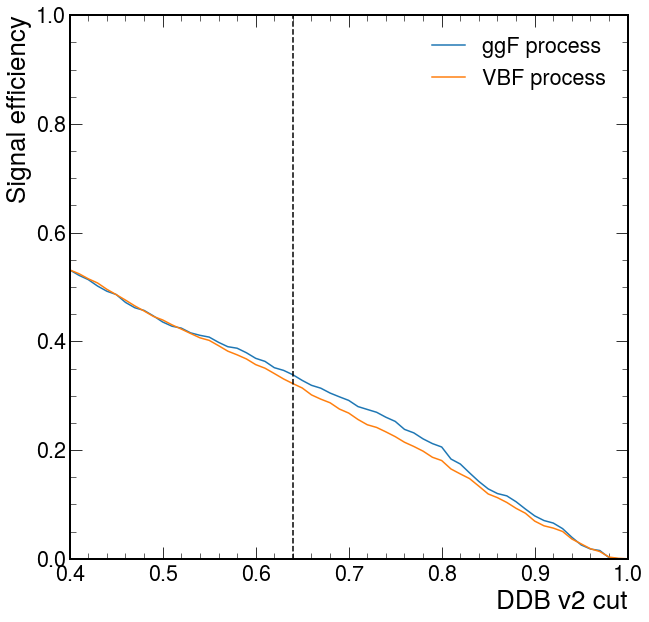

In [14]:
plt.plot(cuts,sigeff_ggf)
plt.plot(cuts,sigeff_vbf)
plt.legend(labels=["ggF process","VBF process"])
plt.xlabel('DDB v2 cut')
plt.ylabel('Signal efficiency')
plt.xlim(0.4,1)
plt.ylim(0,1)

plt.plot([0.64,0.64],[-1,1],color='black',linestyle='--')